# Import Libraries & Data

In [1]:
import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt  
import seaborn as sns 

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "./data/"

data2015 = "QLD_Demand_2015.csv"
data2016 = "QLD_Demand_2016.csv"
data2017 = "QLD_Demand_2017.csv"
data2018 = "QLD_Demand_2018.csv"
data2019 = "QLD_Demand_2019.csv"

In [3]:
df_2015 = pd.read_csv(path+data2015)
df_2016 = pd.read_csv(path+data2016)
df_2017 = pd.read_csv(path+data2017)
df_2018 = pd.read_csv(path+data2018)
df_2019 = pd.read_csv(path+data2019)

In [4]:
df_2019.head(5)

,Year,Month,Day,1,2,3,4,5,6,7,...,39,40,41,42,43,44,45,46,47,48
0,2019,7,1,5038.046261,4893.298442,4812.510516,5089.699876,5034.010263,5015.952584,5016.323656,...,6681.604594,6588.717407,6491.458487,6327.184184,6135.312511,5992.603110,5887.341930,5827.336361,5644.424396,5427.165596
1,2019,7,2,5189.576449,5064.381033,4964.569497,4901.258313,4835.904248,4785.707645,4780.554725,...,6770.329532,6639.757175,6581.061419,6403.543248,6228.336495,6075.696463,5950.058346,5859.260499,5632.482935,5396.449248
2,2019,7,3,5195.546938,5056.404474,4926.419282,4822.543989,4813.111052,4770.640670,5105.765722,...,6590.870527,6509.860980,6433.991465,6254.808325,6092.331185,5955.253478,5840.541074,5706.552577,5514.894237,5263.798633
3,2019,7,4,5053.061277,4917.829335,4820.261996,5106.352202,5046.758006,5014.895309,5027.904136,...,6630.615682,6540.065343,6466.057456,6297.972315,6137.186322,5955.248920,5833.360476,5744.255002,5520.218639,5312.090892
4,2019,7,5,5108.489302,4961.653021,4820.564786,5104.855207,5057.554315,5030.361640,4999.119796,...,6390.644654,6330.229478,6239.213552,6085.992294,5966.086875,5838.694624,5740.298556,5715.567778,5529.707047,5304.319088


# Data Adjustment

In [6]:
# Combine into 1 dataset from 2015-2019
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0, ignore_index=True)
df["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [7]:
#Remove 2020 from the datasets
df = df[df["Year"] != 2020]

In [8]:
df["day_average"] = df.iloc[:,3:].mean(axis=1)
df[["Year","Month","Day","day_average"]]

,Year,Month,Day,day_average
0,2015,7,1,5838.946839
1,2015,7,2,6129.744207
2,2015,7,3,5674.899024
3,2015,7,4,5679.238335
4,2015,7,5,5646.192006
...,...,...,...,...
1640,2019,12,27,5604.242731
1641,2019,12,28,5509.465209
1642,2019,12,29,5629.409847
1643,2019,12,30,5758.151576


# Data Visualization Function

In [142]:
#Visualize electricity demand in a single day
def day_viz(day,month,year,df):
    #Filter data to chosen month-year
    choosen_time = df[(df['Year'] == year) & (df['Month'] == month) & (df['Day'] ==  day)]
    #Flatten value from columns 1-48 into arrayeee
    half_hour_intervals = choosen_time.iloc[:, 3:-1].values.flatten() 

    # Generate time labels in HH:MM format starting from 04:00 - Asked GPT for this
    time_labels = []
    for i in range(len(half_hour_intervals)):
        total_minutes = (4 * 60) + (i * 30)  # Start from 04:00, each step is 30 minutes
        hours = (total_minutes // 60) % 24  # Ensure 24-hour format
        minutes = total_minutes % 60
        time_labels.append(f'{hours:02d}:{minutes:02d}')  # Format as HH:MM
        
    #Start Plot
    plt.figure(figsize=(15, 6))
    plt.plot(time_labels, half_hour_intervals, marker='.', linestyle='-', label=f'{year}-{month:02d}-{day:02d}')
    #Description
    plt.title(f'Electricity Demand for {day}-{month}-{year}', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Electricity Demand', fontsize=12)
    plt.xticks(rotation=45, fontsize=10) 
    plt.grid(True, linestyle='--', alpha=0.3, axis='both')
    plt.tight_layout()
    plt.show()


#Visualize electricity demand in a single month by days
def daily_viz(month,year):
    #Filter data to chosen month-year
    choosen_time = df[(df['Year'] == year) & (df['Month'] == month)]

    #Start Plot
    plt.figure(figsize=(10,6))
    plt.plot(
    choosen_time['Day'],
    choosen_time['day_average'],
    marker='.',
    linestyle='solid',
    label=f'Month {month}, Year {year}'
    )
    plt.xticks(ticks=choosen_time['Day'], fontsize=10)
    #Description
    plt.title(f'Trend of Daily Electricity Demand in {month}-{year}', fontsize=14)
    plt.xlabel('Day of the Month', fontsize=12)
    plt.ylabel('Daily Demand', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3, axis='both')
    plt.show()

#Visualize electricity demand in a single year by months
def monthly_viz(year):
    #Filter data to chosen year
    choosen_time = df[["Year","Month","Day","day_average"]]
    choosen_time = df[(df['Year'] == year)]
    month_average = choosen_time.groupby(['Year', 'Month'])['day_average'].mean().reset_index()
    #Rename columns
    month_average.columns = ['Year', 'Month', 'month_average']

    #Start Plot
    plt.figure(figsize=(10,6))
    plt.plot(
    month_average['Month'],
    month_average['month_average'],
    marker='.',
    linestyle='solid',
    label=f'Year {year}'
    )

    plt.xticks(ticks=choosen_time['Month'], fontsize=10)
    #Description/Customization
    plt.title(f'Trend of Monthly Electricity Demand in {year}', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Monthly Demand', fontsize=12)
    # Customize the gridlines for both axes
    plt.grid(True, linestyle='--', alpha=0.3, axis='both')  # Adjusts both horizontal and vertical gridlines
    plt.show()


def monthly_viz_years(df, title):
    # Filter relevant columns
    chosen_time = df[["Year", "Month", "Day", "day_average"]]
    
    # Group data by Year and Month and calculate monthly averages
    month_average = chosen_time.groupby(["Year", "Month"])["day_average"].mean().reset_index()
    month_average.columns = ["Year", "Month", "month_average"]

    # Start Plot
    plt.figure(figsize=(12, 8))

    # Loop through all years and plot each year's data
    for year in month_average['Year'].unique():
        year_data = month_average[month_average['Year'] == year]
        if (year == 2020):
            plt.plot(
                year_data['Month'],
                year_data['month_average'],
                marker='.',
                linestyle='-',
                label=f'Year {year}',
                alpha=1.0,
                linewidth=2
            )
        else:
            plt.plot(
                year_data['Month'],
                year_data['month_average'],
                marker='.',
                linestyle='-',
                label=f'Year {year}',
                ##Change alpha depends on case
                alpha=0.3,
                linewidth=1
            )
            

    # Description/Customization
    plt.title(title, fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Monthly Demand', fontsize=12)
    plt.xticks(range(1, 13), fontsize=10)  # Months 1-12
    plt.grid(True, linestyle='--', alpha=0.3, axis='both')  # Customize the gridlines
    plt.legend(fontsize=12, title="Years")
    plt.tight_layout()
    plt.show()



# Data Visualisation Example

### Visualize a single day

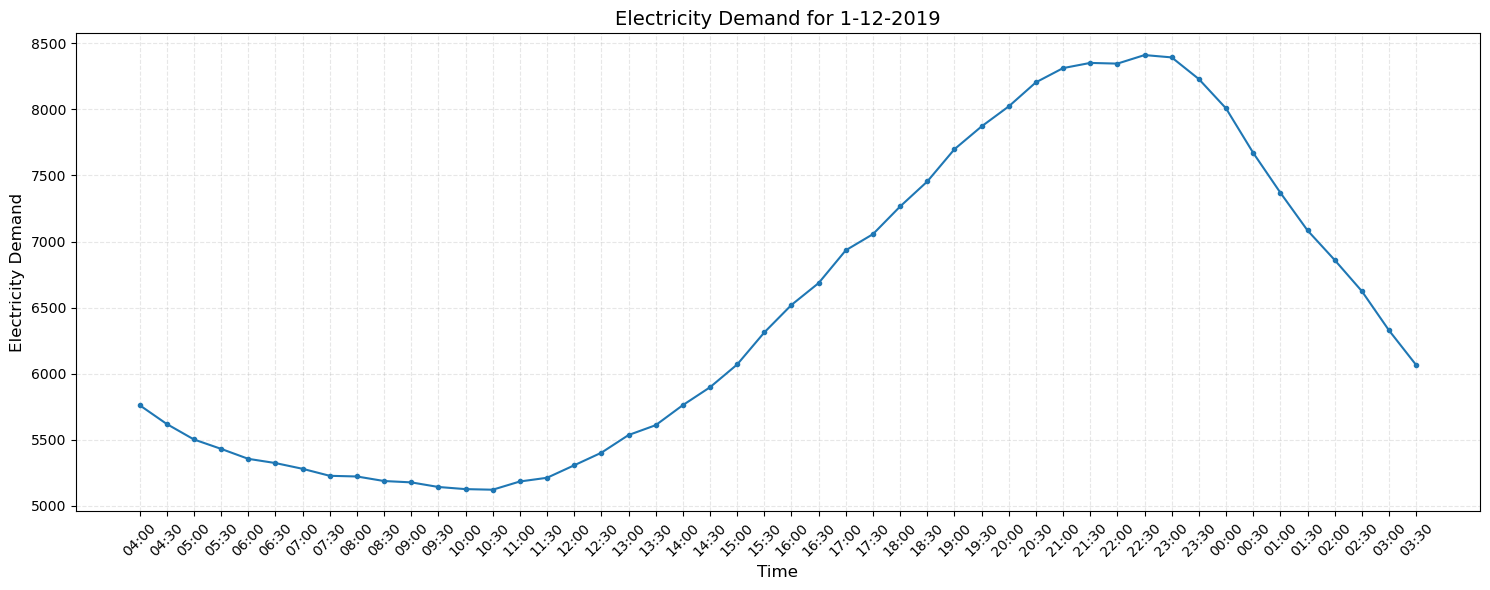

In [10]:
#day_viz(day,month,year)
day_viz(1,12,2019)

### Visualize a certain month

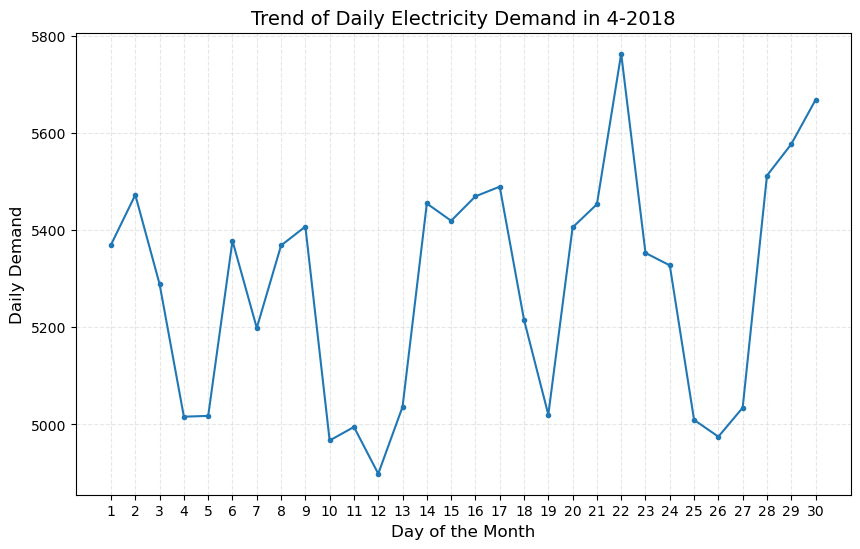

In [121]:
#daily_viz(month,year)
daily_viz(4,2018)

### Visualize a year

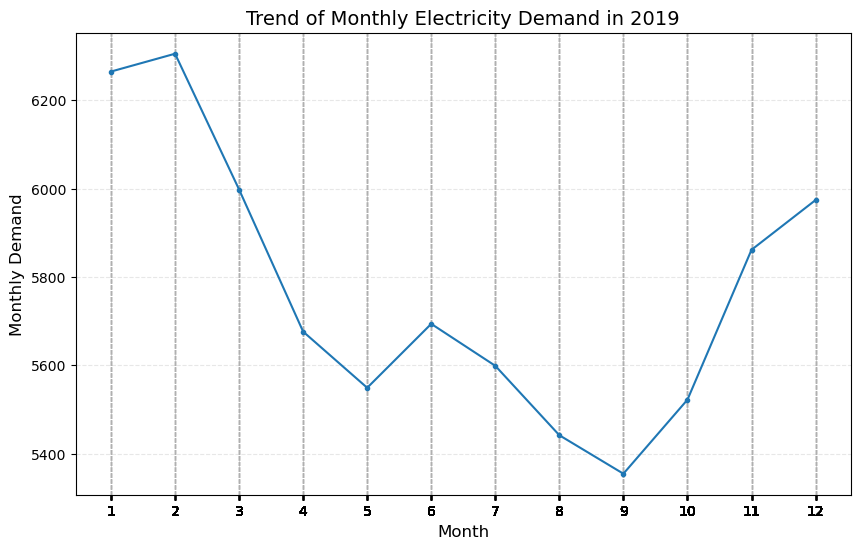

In [12]:
#monthly_viz(year)
monthly_viz(2019)

### Visualize all years against each other

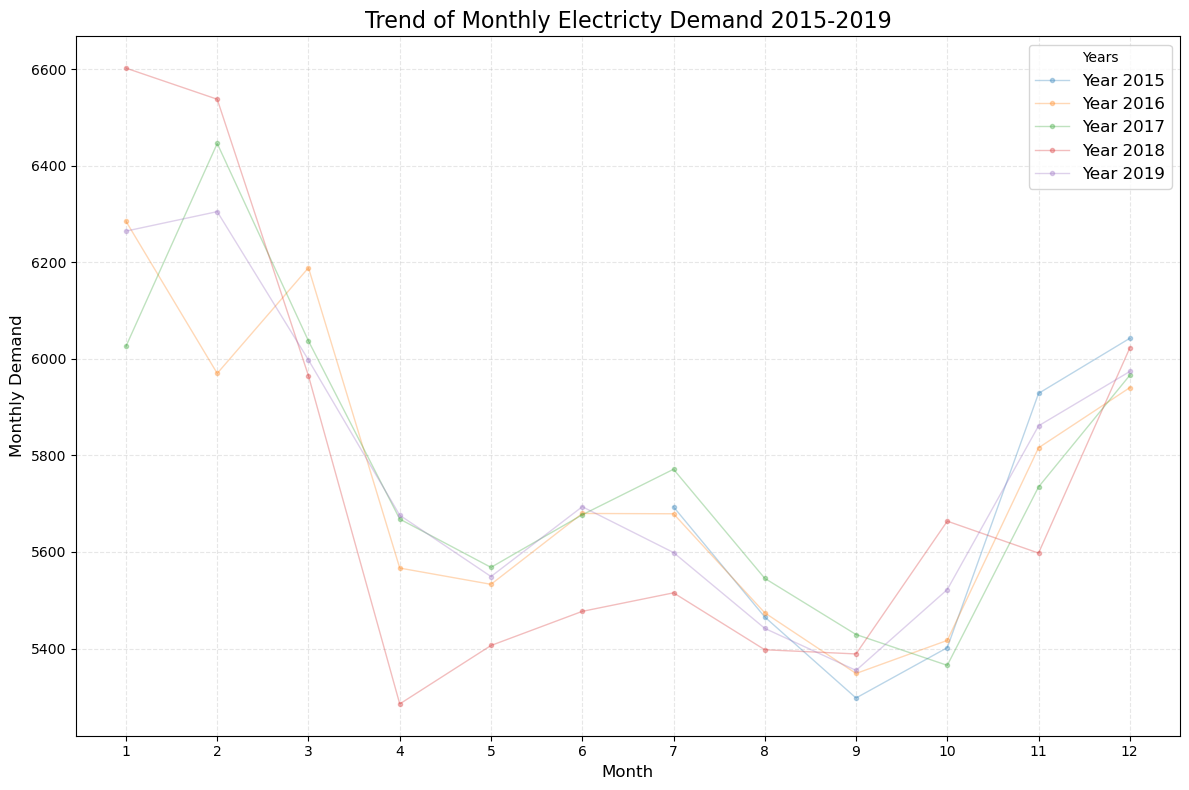

In [13]:
#monthly_viz_years(df,title)
monthly_viz_years(df, "Trend of Monthly Electricty Demand 2015-2019")

## Baseline of seasonally adjusted 2020 Queensland electricity by averaging demand over the past 5 years.

### Create statistic for 2020 Queensland by averaging history

In [14]:
# Group data by month and day and taking the mean
df_2020 = df.groupby(["Month","Day"])[df.columns[3:]].mean().reset_index()
df_2020['Year'] = 2020


# shift column 'Name' to first position 
first_column = df_2020.pop('Year') 
  
# insert column using insert(position,column_name, 
# first_column) function 
df_2020.insert(0, 'Year', first_column) 

In [15]:
df_2020

,Year,Month,Day,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,day_average
0,2020,1,1,5852.680493,5737.567103,5615.764430,5531.742920,5447.605645,5394.700537,5352.527236,...,7132.427397,6999.041655,6778.294291,6624.668406,6465.805474,6316.609753,6198.455163,6015.530373,5805.471148,5948.253994
1,2020,1,2,5632.461606,5487.935021,5363.866206,5266.091178,5225.096961,5192.479039,5186.143797,...,7240.641405,7126.296953,6933.054266,6729.619394,6549.923826,6368.972896,6240.964075,6077.857541,5881.771316,6038.176204
2,2020,1,3,5732.025049,5601.031687,5481.013718,5390.988178,5345.704546,5316.615560,5279.059900,...,7074.741818,6960.213911,6792.459482,6659.044517,6524.471739,6401.686792,6309.416481,6125.593917,5911.740136,6061.339351
3,2020,1,4,5591.475531,5447.063024,5321.589175,5238.835564,5188.126336,5156.340850,5133.232131,...,6748.801490,6651.502266,6487.360537,6358.869402,6259.527132,6166.459325,6091.403528,5906.684966,5704.385195,5584.785050
4,2020,1,5,5509.171952,5373.223363,5249.384786,5154.461367,5094.958259,5050.329402,5048.108770,...,6797.335381,6711.735470,6520.715906,6385.849823,6232.097444,6114.721453,6023.380459,5827.807286,5624.424784,5520.714915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020,12,27,5660.346920,5511.471406,5410.184898,5325.735213,5272.734077,5237.661014,5220.782665,...,7086.710656,6976.562320,6805.661970,6657.821905,6517.210210,6391.762713,6279.782067,6081.458575,5868.556822,5977.944543
362,2020,12,28,5484.081975,5338.246389,5316.228203,5236.738306,5184.281392,5148.488099,5122.134352,...,6806.958936,6722.248287,6564.659590,6445.048109,6335.095981,6191.430813,6109.106972,5959.396095,5749.557400,5624.135417
363,2020,12,29,5563.783685,5420.834061,5315.657535,5227.324788,5167.533672,5128.366660,5105.546848,...,6608.357084,6518.395745,6370.940190,6268.319748,6169.590618,6082.928244,6007.567134,5846.213897,5643.874049,5653.216418
364,2020,12,30,5521.758012,5390.839597,5284.629263,5220.032914,5173.275516,5143.138454,5131.229047,...,7176.310047,7031.056763,6855.197727,6706.202577,6534.837644,6378.823093,6265.401723,6086.281270,5867.062038,6013.422854


In [17]:
#Export df_2020
df_2020.to_csv('QLD_Demand_2020_predicted.csv', index=False, float_format='%.6f')

In [18]:
#Append df_2020 into df
df = pd.concat([df, df_2020], axis=0, ignore_index=True)
df["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

## Visualize Predicted 2020

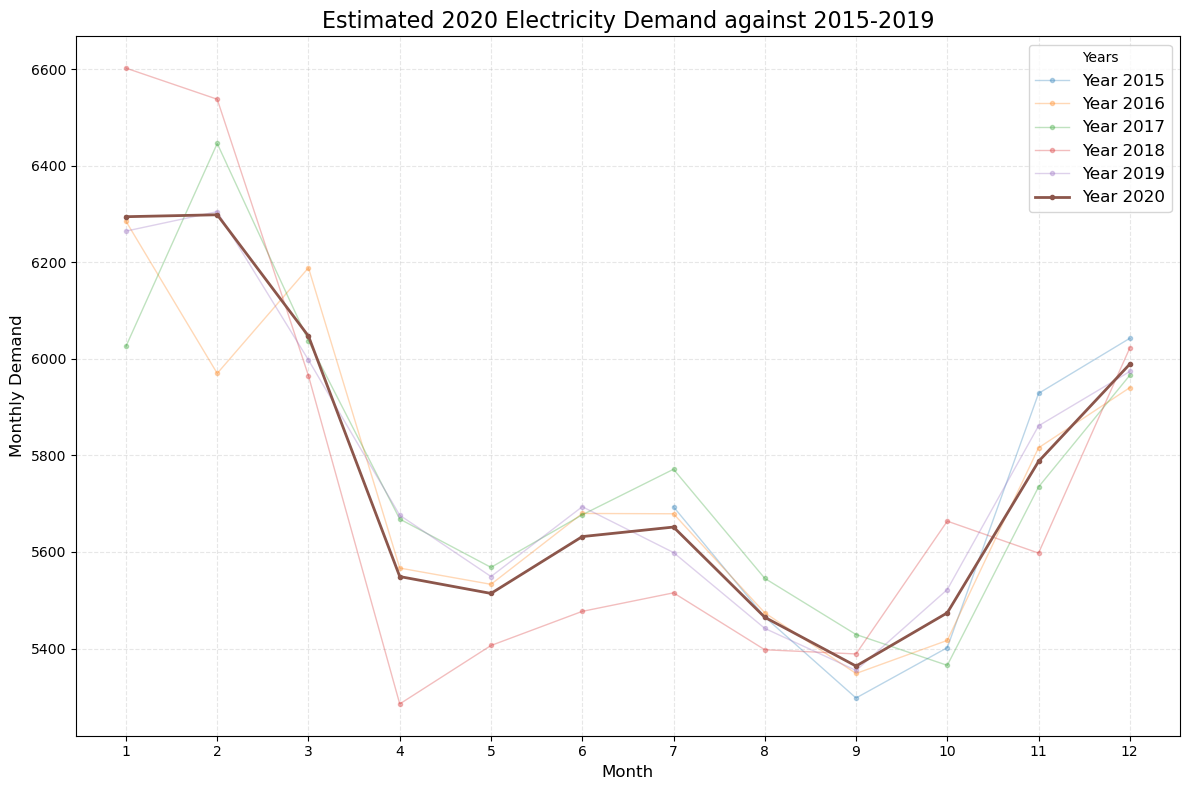

In [19]:
monthly_viz_years(df, "Estimated 2020 Electricity Demand against 2015-2019")

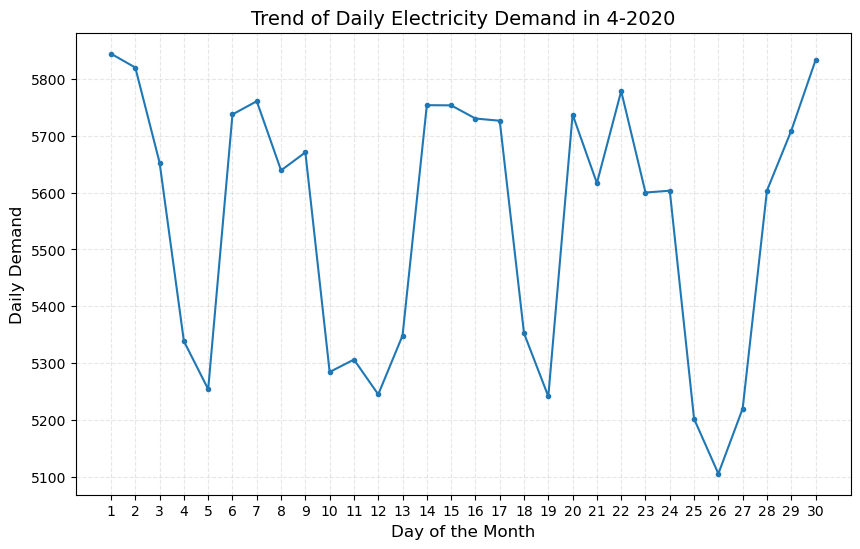

In [20]:
daily_viz(4,2020)

## Getting actual 2020 data

In [84]:
df_actual2020 = pd.read_csv(path+"PRICE_AND_DEMAND_202004_QLD1.csv")
#Take only necessary columns
df_actual2020 = df_actual2020[["SETTLEMENTDATE","TOTALDEMAND"]]
df_actual2020.head(5)

,SETTLEMENTDATE,TOTALDEMAND
0,2020/04/01 00:30:00,5710.84
1,2020/04/01 01:00:00,5604.44
2,2020/04/01 01:30:00,5511.97
3,2020/04/01 02:00:00,5419.03
4,2020/04/01 02:30:00,5406.11


In [85]:
#Reformat date-time
df_actual2020['SETTLEMENTDATE'] = pd.to_datetime(df_actual2020['SETTLEMENTDATE']) 
df_actual2020['Year'] = df_actual2020['SETTLEMENTDATE'].dt.year
df_actual2020['Month'] = df_actual2020['SETTLEMENTDATE'].dt.month
df_actual2020['Day'] = df_actual2020['SETTLEMENTDATE'].dt.day
df_actual2020['Time'] = df_actual2020['SETTLEMENTDATE'].dt.time
#Remove data up to 2020-04-01 03:30:00 due to day starting from 4am-4am
df_actual2020 = df_actual2020.iloc[7:,1:]
#Push 8 values down so that day would be 4am-4am
df_actual2020['Day'] = df_actual2020['Day'].shift(8, fill_value=1)
# Add an Interval column that resets for each day
df_actual2020.head(10)

,TOTALDEMAND,Year,Month,Day,Time
7,5352.18,2020,4,1,04:00:00
8,5405.77,2020,4,1,04:30:00
9,5457.24,2020,4,1,05:00:00
10,5555.04,2020,4,1,05:30:00
11,5663.65,2020,4,1,06:00:00
12,5933.06,2020,4,1,06:30:00
13,6023.95,2020,4,1,07:00:00
14,6098.54,2020,4,1,07:30:00
15,5982.92,2020,4,1,08:00:00
16,5910.84,2020,4,1,08:30:00


In [106]:
# Add an Interval column that assigns numbers 1 to 48 for each day - This part tricky, helped by GPT
df_actual2020['Interval'] = (
    df_actual2020.groupby(['Year', 'Month', 'Day']).cumcount() + 1
)

# Pivot the DataFrame to reshape it into the desired format
reshaped_df = df_actual2020.pivot(
    index=['Year', 'Month', 'Day'],  # Group by Year, Month, Day
    columns='Interval',             # Use Interval as the new columns
    values='TOTALDEMAND'            # Populate with TOTALDEMAND values
).reset_index()

# Rename Interval columns to be strings for consistency
reshaped_df.columns.name = None  # Remove the grouping name
reshaped_df.columns = ['Year', 'Month', 'Day'] + [str(i) for i in range(1, 49)]

# Adjust the reshaped DataFrame
true_2020_april = reshaped_df[:-1]
true_2020_april["day_average"] = df.iloc[:,3:].mean(axis=1)
true_2020_april = true_2020_april.astype({"Year": str})
true_2020_april['Year'] = true_2020_april['Year'].replace('2020', '2020 True')
true_2020_april

,Year,Month,Day,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,day_average
0,2020 True,4,1,5352.18,5405.77,5457.24,5555.04,5663.65,5933.06,6023.95,...,6043.26,5843.70,5700.73,5580.03,5475.40,5420.41,5378.51,5351.42,5346.51,5838.946839
1,2020 True,4,2,5338.55,5383.96,5460.14,5603.40,5776.33,5986.70,6095.67,...,6134.08,5957.18,5809.34,5645.77,5577.23,5492.94,5431.18,5395.67,5371.48,6129.744207
2,2020 True,4,3,5347.09,5413.23,5517.18,5661.89,5750.78,5970.48,6120.10,...,6295.85,6072.59,5907.93,5786.96,5677.18,5631.22,5582.71,5575.84,5544.68,5674.899024
3,2020 True,4,4,5510.36,5511.97,5530.73,5571.21,5587.48,5645.59,5665.29,...,6209.36,6017.29,5823.49,5671.05,5550.01,5474.26,5440.33,5376.04,5370.76,5679.238335
4,2020 True,4,5,5323.37,5321.62,5312.67,5361.66,5428.41,5393.03,5372.13,...,5966.53,5724.77,5574.87,5442.37,5396.75,5290.17,5286.95,5235.49,5244.72,5646.192006
5,2020 True,4,6,5237.12,5269.95,5358.22,5510.54,5636.73,5858.75,5928.25,...,6024.55,5810.72,5640.75,5509.24,5423.34,5354.45,5340.64,5298.79,5276.96,5227.731403
6,2020 True,4,7,5282.30,5312.82,5375.12,5529.27,5621.21,5825.89,5974.45,...,5965.98,5806.57,5660.67,5538.15,5426.21,5373.40,5388.41,5350.74,5305.99,5261.354599
7,2020 True,4,8,5338.57,5370.81,5451.89,5562.62,5706.12,5882.64,6035.36,...,5923.44,5731.10,5599.15,5508.54,5412.28,5344.57,5335.15,5311.73,5263.70,6032.065974
8,2020 True,4,9,5296.57,5345.84,5434.44,5536.43,5682.54,5856.06,6003.45,...,5968.68,5751.20,5576.64,5438.23,5346.76,5309.31,5247.20,5231.68,5210.06,6057.205558
9,2020 True,4,10,5195.54,5197.56,5213.56,5246.70,5272.81,5300.47,5331.80,...,5884.84,5677.08,5532.38,5374.27,5304.18,5245.73,5213.06,5190.75,5186.95,6044.960027


# Visualize True 2020

In [117]:
#Merge all data together
df_april = df[df["Month"] == 4]
df_april = df_april.astype({"Year": str})
df_april['Year'] = df_april['Year'].replace('2020', '2020 Predicted')
df_april = pd.concat([df_april,true_2020_april], axis=0, ignore_index=True)
df_april["Month"].unique()

array([4], dtype=int64)

In [118]:
df_april

,Year,Month,Day,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,day_average
0,2016,4,1,5564.601973,5434.836853,5291.338574,5176.717717,5116.741359,5104.787332,5080.118482,...,6801.760738,6756.046661,6625.807922,6444.508642,6285.205232,6143.390659,5999.768324,5909.592498,5782.010268,6017.610151
1,2016,4,2,5606.862780,5431.306382,5295.048187,5179.931612,5107.238721,5069.216100,5040.766620,...,6821.905184,6779.568564,6629.772215,6458.584279,6315.677007,6191.494235,6088.319194,5962.888093,5797.176331,5918.215460
2,2016,4,3,5460.197692,5291.917608,5167.631589,5055.072821,4990.763385,4959.810780,4950.764126,...,6462.940996,6399.617038,6290.893384,6177.291877,6076.967922,5997.162041,5877.757425,5795.753464,5646.053042,5559.619888
3,2016,4,4,5454.529772,5310.385830,5196.459482,5103.811044,5022.566134,4979.762387,4937.322060,...,6260.397984,6199.706190,6059.472321,5998.742657,5945.694430,5851.160964,5770.695821,5704.014297,5584.280918,5317.177482
4,2016,4,5,5420.488466,5280.769020,5128.562023,5024.463030,4954.620980,4891.411672,4874.052873,...,6382.216229,6337.256282,6183.106754,6075.135397,6004.473918,5909.719442,5761.837725,5687.282875,5596.800986,5219.685079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2020 True,4,26,5119.150000,5111.570000,5113.540000,5138.150000,5159.210000,5184.070000,5244.660000,...,5677.560000,5489.850000,5359.950000,5256.370000,5211.900000,5180.890000,5139.180000,5125.780000,5117.380000,5598.772441
176,2020 True,4,27,5110.690000,5210.220000,5245.040000,5379.370000,5534.310000,5742.670000,5913.230000,...,5899.240000,5677.420000,5564.780000,5466.930000,5334.850000,5273.180000,5295.420000,5246.470000,5217.840000,5444.749208
177,2020 True,4,28,5208.730000,5290.100000,5350.330000,5430.800000,5601.420000,5841.930000,5984.900000,...,5861.000000,5572.920000,5450.060000,5337.550000,5256.470000,5234.940000,5268.230000,5232.590000,5198.100000,5189.721809
178,2020 True,4,29,5202.590000,5256.860000,5331.140000,5501.580000,5614.090000,5803.740000,5949.680000,...,5881.460000,5709.300000,5545.220000,5418.550000,5340.080000,5304.650000,5250.600000,5229.270000,5224.070000,5608.608330


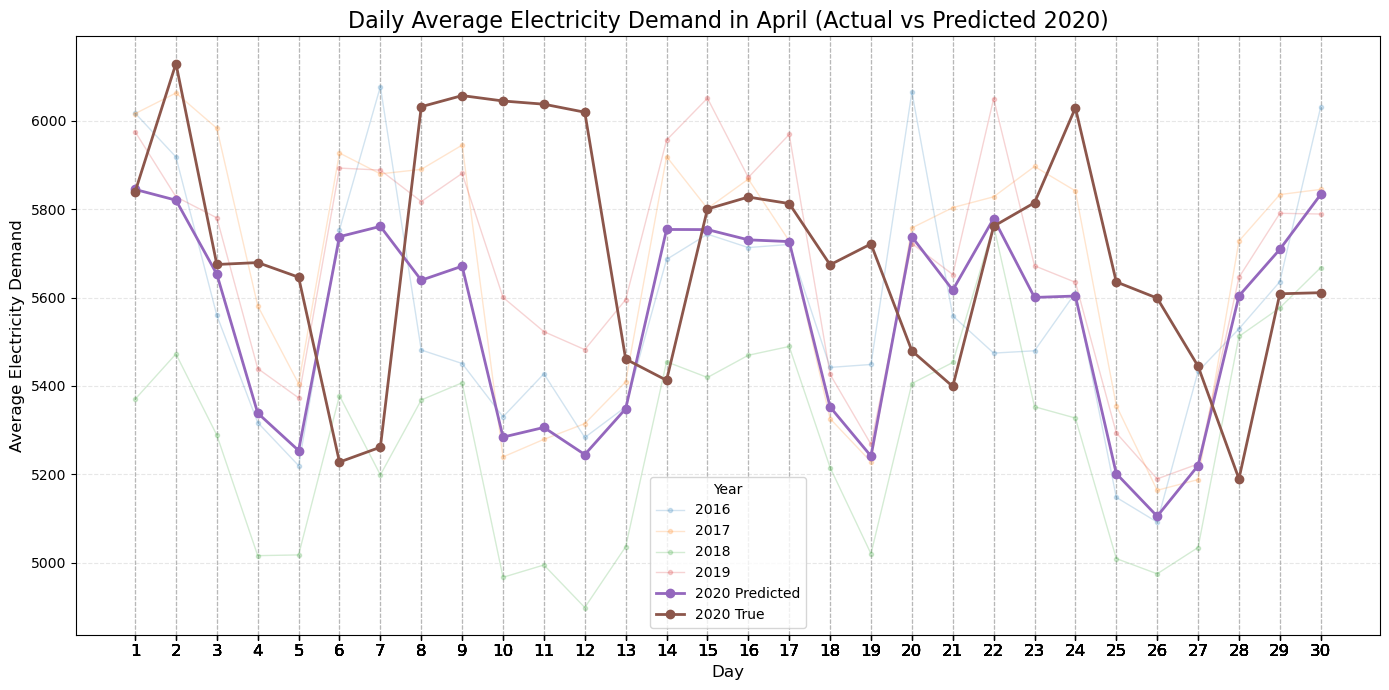

In [140]:
# Plot April of all years
plt.figure(figsize=(14, 7))

for year in df_april['Year'].unique():
    # Filter data for the specific year
    year_data = df_april[df_april['Year'] == year]
    # Plot each year's data
    if (year == "2020 Predicted" or year == "2020 True"):  
        plt.plot(
                year_data['Day'],
                year_data['day_average'],
                marker='o',
                linestyle='-',
                label=str(year),
                alpha=1.0,
                linewidth=2
            )
    else:
        plt.plot(
            year_data['Day'], 
            year_data['day_average'], 
            marker='.', 
            label=str(year),
            alpha=0.2,
            linewidth=1
        )

# Customize the plot
plt.xticks(ticks=df_april['Day'], fontsize=12)
plt.title('Daily Average Electricity Demand in April (Actual vs Predicted 2020)', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Electricity Demand', fontsize=12)
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

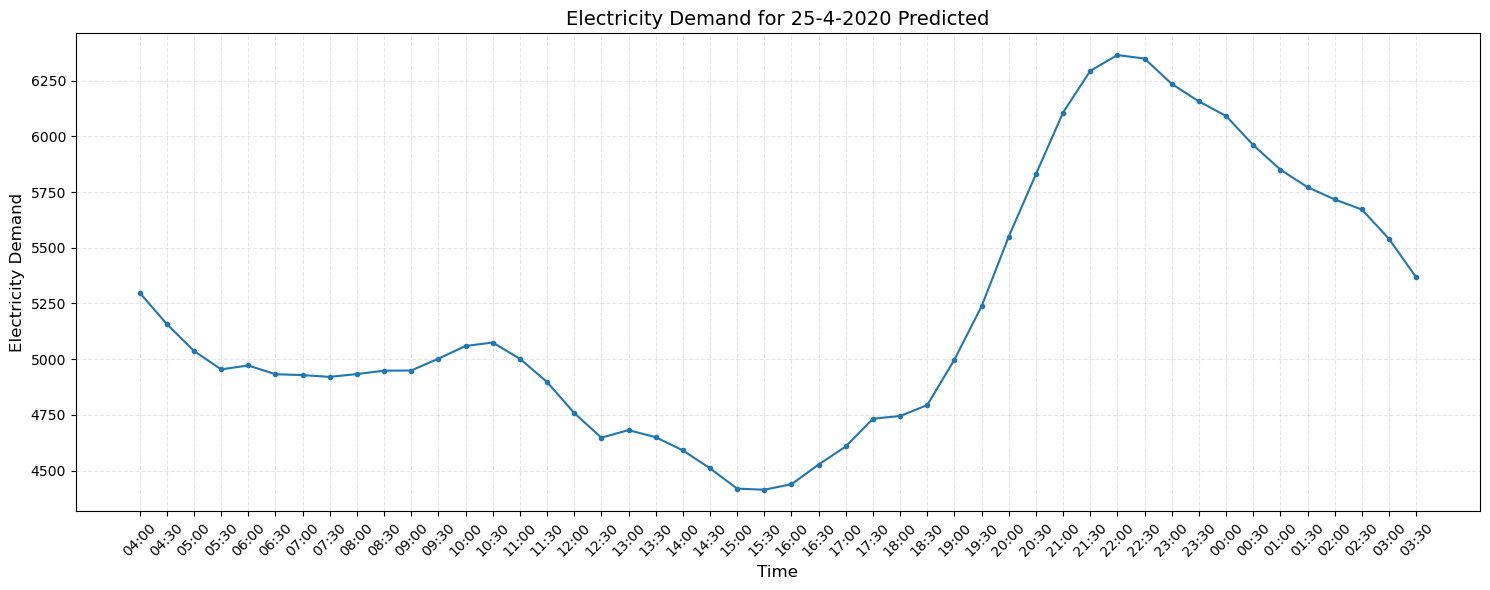

In [143]:
day_viz(25,4,"2020 Predicted",df_april)

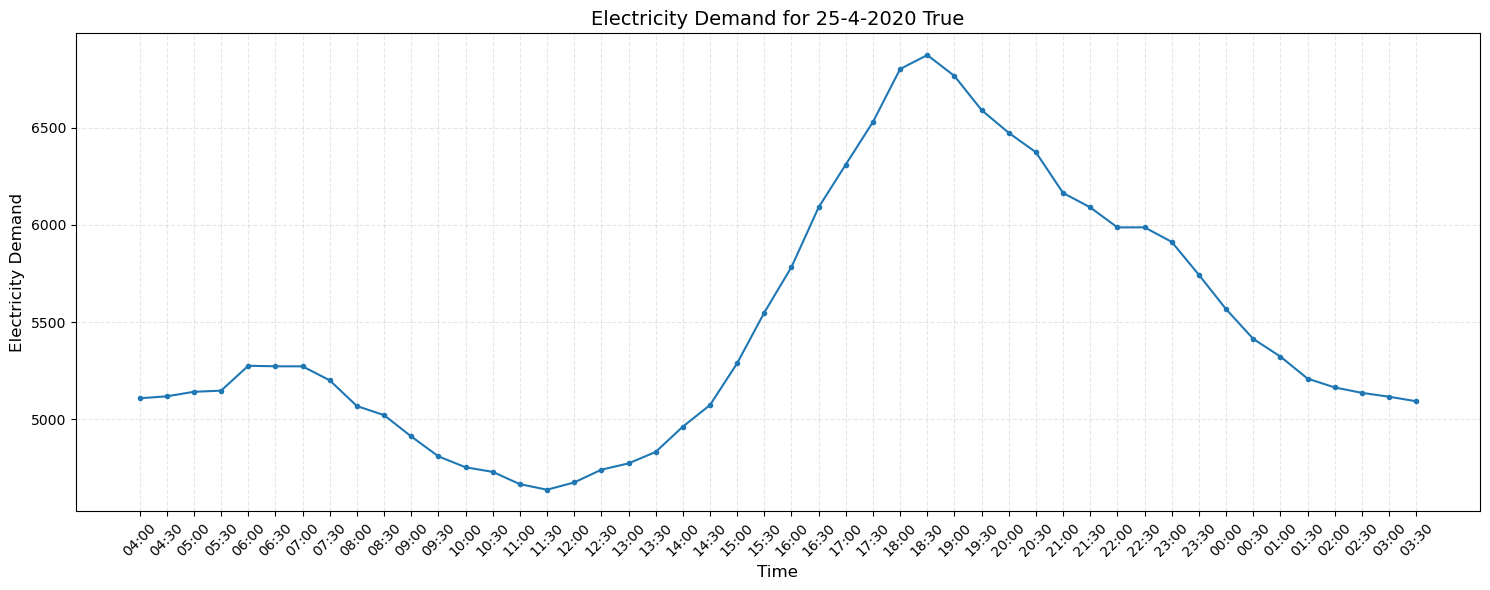

In [144]:
day_viz(25,4,"2020 True",df_april)

# Visualize 1st April 2020 Week

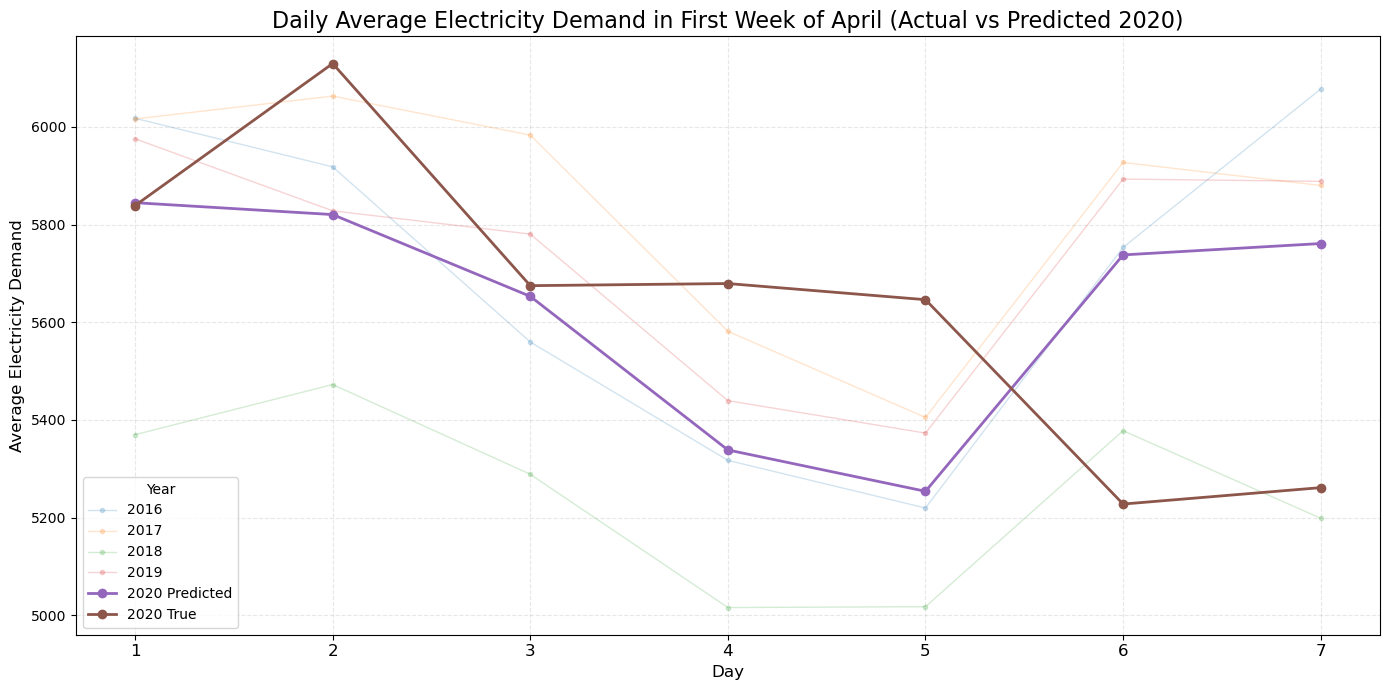

In [157]:
# For sake of simplicity, every 7 days is a week starting from 1st of April
# Plot April of all years
plt.figure(figsize=(14, 7))

for year in df_april['Year'].unique():
    # Filter data for the specific year
    year_data = df_april[df_april['Year'] == year]
    #Take first week
    year_data = year_data.iloc[:7]
    # Plot each year's data
    if (year == "2020 Predicted" or year == "2020 True"):  
        plt.plot(
                year_data['Day'],
                year_data['day_average'],
                marker='o',
                linestyle='-',
                label=str(year),
                alpha=1.0,
                linewidth=2
            )
    else:
        plt.plot(
            year_data['Day'], 
            year_data['day_average'], 
            marker='.', 
            label=str(year),
            alpha=0.2,
            linewidth=1
        )

# Customize the plot
plt.xticks(ticks=year_data['Day'], fontsize=12)
plt.title('Daily Average Electricity Demand in First Week of April (Actual vs Predicted 2020)', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Electricity Demand', fontsize=12)
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()